# XOR Gate using NN

We are tackling a binary classification problem. The output layer will contain one node that will use the sigmoid activation function! 

In [1]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

In [3]:
Y.flatten() == 0

array([ True, False, False,  True])

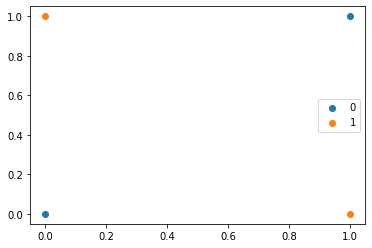

In [4]:
for i in range(2):
    s = np.where(Y.flatten() == i)
    plt.scatter(X[s].T[0], X[s].T[1], label=str(i))
    
plt.legend()
plt.show()

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def initializeParametersHe(InputSize, HiddenLayerSize, OutputSize):
    W1 = np.random.randn(HiddenLayerSize, InputSize)* np.sqrt(2/InputSize)
    W2 = np.random.randn(OutputSize, HiddenLayerSize)* np.sqrt(2/HiddenLayerSize)
    b1 = np.zeros((HiddenLayerSize, 1))
    b2 = np.zeros((OutputSize, 1))
    
    parameters = {"W1": W1, "W2": W2, "b1": b1, "b2":b2}
    return parameters

In [7]:
def forwardPass(X, Y, parameters):
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    Z1 = np.dot(X, W1.T) + b1.T
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2.T) + b2.T
    A2 = sigmoid(Z2)
    cache = (A1, Z1, W1, b1, A2, Z2, W2, b2)
    cross_entropies= -(np.multiply(Y, np.log(A2))+np.multiply((1-Y), np.log(1-A2)))
    cost= np.sum(cross_entropies)/X.shape[0]
    return cost, cache, A2

In [8]:
def backwardPass(X, Y, cache):
    m = X.shape[0]
    (A1, Z1, W1, b1, A2, Z2, W2, b2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2.T, A2) / m
    db2= np.sum(dZ2.T, axis=1,keepdims=True)
    dA1=np.dot(dZ2,W2)
    dZ1=np.multiply(dA1, A1*(1 - A1))
    dW1=np.dot(dZ1.T, X)/m
    db1=np.sum(dZ1.T, axis=1, keepdims=True) /m
    
    gradients={"dZ2":dZ2 , "dW2":dW2, "db2": db2,"dZ1":dZ1 , "dW1":dW1 , "db1": db1 }
    
    return gradients 

In [9]:
def GradientDescent(parameters, gradients, learningRate):
    parameters["W1"]=parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"]=parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"]=parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"]=parameters["b2"] - learningRate * gradients["db2"]
    
    return parameters

In [10]:
parameters = initializeParametersHe(2, 2, 1)

In [11]:
epoch= 100000
learningRate=0.1
losses=np.zeros((epoch,1))
for i in range(epoch) :
    losses[i, 0] ,cache, A2= forwardPass(X, Y,parameters)
    gradients = backwardPass(X, Y, cache)
    parameters= GradientDescent(parameters, gradients, learningRate)

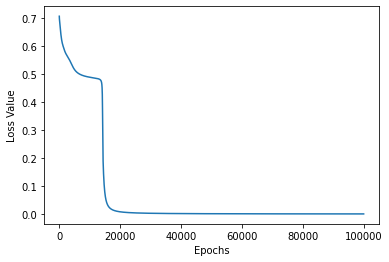

In [12]:
plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
_, _, A2= forwardPass(X,Y,parameters)
y_test = Y
y_pred = [1 if a > 0.5 else 0 for a in A2]
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 1.0
